# Objective:
Create a simpy model that has 3 sequential steps 

In [4]:
import simpy
import pandas as pd
import pm4py
import random

In [2]:
log_list = []

In [3]:
env = simpy.Environment() 
process_A_resource = simpy.Resource(env, capacity = 1)
process_B_resource = simpy.Resource(env, capacity = 1)
process_C_resource = simpy.Resource(env, capacity = 1)

In [4]:
def process_A (entity,env):
    
    with process_A_resource.request() as request:
        yield request
        yield env.timeout(2)
        #print('process A happend')
        log_list.append([entity, env.now, 'process_A' ])

In [5]:
def process_B(entity,env):
    with process_B_resource.request() as request:
        yield request
        yield env.timeout(2)
       # print('process B happend')
        log_list.append([entity, env.now, 'process_B' ])

In [6]:
def process_C(entity,env):
    with process_C_resource.request() as request:
        yield request
        yield env.timeout(2)
       # print('process C happend')
        log_list.append([entity, env.now, 'process_C' ])

In [7]:
def run_definition(env):
    entity = 1
   
    while env.now < 20:
        entity += 1
        yield env.timeout(2)
        env.process(process_A(entity,env))
        env.process(process_B(entity,env))
        env.process(process_C(entity,env))
      

In [8]:
env.process(run_definition(env))
env.run(90)

# New_seq_process

In [84]:
class process_scenario():
    
    def __init__(self):
        
        self.env = simpy.Environment() 
        self.process_A_resource = simpy.Resource(self.env, capacity = 1)
        self.process_B_resource = simpy.Resource(self.env, capacity = 1)
        self.process_C_resource = simpy.Resource(self.env, capacity = 1)
    
    def process_A(self):
        yield self.env.timeout(2)
    
    def process_B(self):
        yield self.env.timeout(2)
    
    def process_C(self):
        yield self.env.timeout(2)
    
    

In [85]:
class logger():
    
    def __init__(self):
        self.log_list = []
    
    def to_df(self):
        
        self.log_df = pd.DataFrame(log_list, columns = ['entity' , 'event_time', 'activity'])
        return self.log_df

In [86]:
process_scenario_object = process_scenario()

In [87]:
log_list = []

In [88]:
def action_plan_process_B(entity, process_scenario_object, logger):
    
    with process_scenario_object.process_B_resource.request() as request:
        yield request
        yield process_scenario_object.env.process(process_scenario_object.process_A())
        logger.log_list.append([entity, process_scenario_object.env.now, 'process_B' ])
    

In [89]:
def action_plan_process_C(entity, process_scenario_object, logger):
    
     with process_scenario_object.process_C_resource.request() as request:
        yield request
        yield process_scenario_object.env.process(process_scenario_object.process_A())
        logger.log_list.append([entity, process_scenario_object.env.now, 'process_C' ])

In [90]:
def action_plan_process_C_B(entity, process_scenario_object, logger):
    
    if random.choice([True, False]):
        process_scenario_object.env.process(action_plan_process_B(entity, process_scenario_object, logger))
        process_scenario_object.env.process(action_plan_process_C(entity, process_scenario_object, logger))
    
    else:
        process_scenario_object.env.process(action_plan_process_C(entity, process_scenario_object, logger))
        process_scenario_object.env.process(action_plan_process_B(entity, process_scenario_object, logger))

In [91]:
def action_plan(entity, process_scenario_object, logger):

    with process_scenario_object.process_A_resource.request() as request:
        yield request
        yield process_scenario_object.env.process(process_scenario_object.process_A())
        logger.log_list.append([entity, process_scenario_object.env.now, 'process_A' ])
        
    action_plan_process_C_B(entity, process_scenario_object, logger)
    

In [92]:
def run_definition_new(process_scenario_object, logger):
    entity = 1
    
    while process_scenario_object.env.now < 20:
        entity += 1
        yield process_scenario_object.env.timeout(2)
        process_scenario_object.env.process(action_plan(entity, process_scenario_object, logger))
      

In [93]:
logger_instance = logger()

In [94]:
process_scenario_object = process_scenario()
process_scenario_object.env.process(run_definition_new(process_scenario_object, logger_instance))
process_scenario_object.env.run(90)

In [95]:
logger_instance.log_list

[[2, 4, 'process_A'],
 [2, 6, 'process_C'],
 [2, 6, 'process_B'],
 [3, 6, 'process_A'],
 [3, 8, 'process_B'],
 [3, 8, 'process_C'],
 [4, 8, 'process_A'],
 [4, 10, 'process_B'],
 [4, 10, 'process_C'],
 [5, 10, 'process_A'],
 [5, 12, 'process_B'],
 [5, 12, 'process_C'],
 [6, 12, 'process_A'],
 [6, 14, 'process_B'],
 [6, 14, 'process_C'],
 [7, 14, 'process_A'],
 [7, 16, 'process_C'],
 [7, 16, 'process_B'],
 [8, 16, 'process_A'],
 [8, 18, 'process_C'],
 [8, 18, 'process_B'],
 [9, 18, 'process_A'],
 [9, 20, 'process_B'],
 [9, 20, 'process_C'],
 [10, 20, 'process_A'],
 [10, 22, 'process_C'],
 [10, 22, 'process_B'],
 [11, 22, 'process_A'],
 [11, 24, 'process_B'],
 [11, 24, 'process_C']]

# Process mining

In [96]:
log = pd.DataFrame(logger_instance.log_list, columns = ['entity' , 'event_time', 'activity'])

In [97]:
log.to_csv('../outputs/and_log.csv' )

In [98]:
log_pm = pm4py.format_dataframe(log, case_id = 'entity', activity_key = 'activity', timestamp_key = 'event_time')

In [99]:
process_mode = pm4py.discover_bpmn_inductive(log_pm)

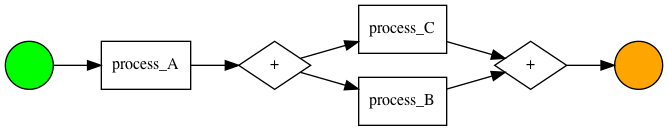

In [100]:
pm4py.view_bpmn(process_mode)

In [101]:
log

,entity,event_time,activity
0,2,4,process_A
1,2,6,process_C
2,2,6,process_B
3,3,6,process_A
4,3,8,process_B
5,3,8,process_C
6,4,8,process_A
7,4,10,process_B
8,4,10,process_C
9,5,10,process_A
